# Final Project - Solving Viscous Burger's Equation with Spectral Fourier Method

In this project I will solve the viscous Burger's equation using the spectral fourier method. The Burger's equation is a nonlinear partial differential equation. Nonlinear equations usually require us to use Newton's method since the Runge-Kutta methods will not work. However, using the spectral method with fourier transform we can overcome the nonlinearity.  

Burger's Equation
$\dfrac{\partial u}{\partial t} +  u\dfrac{\partial u}{\partial x} =  V * \dfrac{\partial^2 u}{\partial x^2}$

Lets solve the equation:
$$ 
\begin{align}

\dfrac{\partial u}{\partial t}  &= V * \dfrac{\partial^2 u}{\partial x^2} - u\dfrac{\partial u}{\partial x} \text{          ,     Apply Fourier transform to both sides}\\
\hat{f}(\dfrac{\partial u}{\partial t})&= \hat{f}(V * \dfrac{\partial^2 u}{\partial x^2}) - \hat{f}(u\dfrac{\partial u}{\partial x}) 
 \text{,       Use } u\dfrac{\partial u}{\partial x} = \dfrac{\partial(\frac{u^2}{2})}{\partial x} \text{            and Fourier transform rule for derivatives} \\
 \hat{f}(\dfrac{\partial u}{\partial t}) &= (ik)^2\hat{f}(V * u) - ik*\hat{f}(\frac{u^2}{2})
 
\end{align}
$$

This gives us a value for $\dfrac{\partial u}{\partial t}$ which means we can now solve the equation using any of the Runge-Kutta methods.

# Testing

For our testing we will use $\dfrac{\partial u}{\partial t} +  u\dfrac{\partial u}{\partial x} =  0.1 * \dfrac{\partial^2 u}{\partial x^2}$ with initial condition 
$u(x,0) = \frac{2*0.1*9*0.2*\pi*sin(0.2*\pi*x)}{10 + 9*cos(0.2*\pi*x)}$

Using the Spectral method, I will use $\frac{\partial u}{\partial t}$ for Forward Euler. Then I will do error analysis and if that says that our method is 1st order than that means the Spectral method with Fourier transforms since Forward Euler is 1st order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exact solution
The exact solution has been chosen with Cole-Hopf transformation
$$u(x,t)  = \frac{2*0.1*9*0.2*\pi*e^{-t*0.1*(0.2*\pi)^2}*sin(0.2*\pi*x)}{10 + 9e^{-t*0.1*(0.2*\pi)^2}*cos(0.2*\pi*x)}$$

In [2]:
def solution(x1, t1):
    b = 10
    a = 9
    k = 0.2 * np.pi
    return (2*0.1* a*k*np.exp(-t1*0.1*k**2)*np.sin(k*x1)) / (b+a * np.exp(-t1*0.1*k**2)*np.cos(k*x1))

## Burger's function   
It is performing the Fourier transforms above and an inverse Fourier transform at the end to get $\dfrac{\partial u}{\partial t}$.

In [3]:
def burger(U, t, k1, k2, mu, nu):
    u_xx = np.fft.ifft(k2 * np.fft.fft(nu*U))
    uu_x = np.fft.ifft(k1 * np.fft.fft(mu*0.5*U**2))
    u_t = (u_xx - uu_x).real
    return u_t

## Forward Euler
For this problem I am choosing to use Forward Euler. It is the most simple of the Runge-Kutta methods. Since the focus of this project is to use the Spectral method and not the finite difference method, I think that Forward Euler is a good choice. 

In [4]:
args = []
mu = 1
nu = 0.1

x0 = 0
xN = 10
dx = 0.01
Nx = int(xN/dx + 1)
x = np.linspace(x0, xN, Nx)

t0 = 0
tN = 10
dt = 0.0001
Nt = int(tN/dt + 1) 
t = np.linspace(t0,tN, Nt)

k = 2*np.pi*np.fft.fftfreq(Nx, d = dx)

k1 = 1j *k
k2 = k1**2

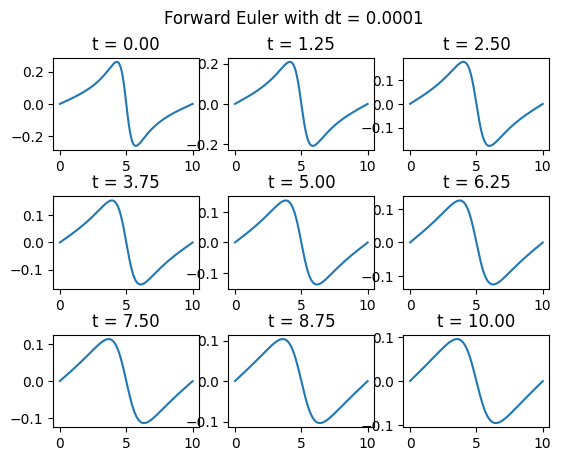

In [5]:
def forward_euler(dt=0.0001, dx = 0.01):    
    t0 = 0
    tN = 10
    Nt = int(tN/dt + 1) 
    t = np.linspace(t0,tN, Nt)
    Nx = int(xN/dx + 1)
    x = np.linspace(x0, xN, Nx)
    k = 2*np.pi*np.fft.fftfreq(Nx, d = dx)

    k1 = 1j *k
    k2 = k1**2


    def U0(x):
        return -2*0.1*(-6*np.sin(2*np.pi*x)) / (10 + 2*np.cos(2*np.pi*x))


    u0 = solution(x, 0)

    U = np.zeros((Nx, Nt))
    U[:, 0] = u0

    for l in range(Nt -1):
        u0 = np.reshape(U[:, (l):(l+1)], (Nx,))
        u_t = burger(u0, t, k1, k2, mu, nu) 
        U[:, (l+1):(l+2)] = np.reshape(u0 + dt* u_t, (Nx, 1))
    return U


U = forward_euler()

plot_rows = 3
plot_cols = 3
num_plots = plot_rows * plot_cols
t_plot = np.linspace(t0, tN, num_plots)

fig = plt.figure()
fig.suptitle("Forward Euler with dt = {}".format(dt))
for j, tval in enumerate(t_plot):
    k = round(tval / dt)
    ax = fig.add_subplot(plot_rows, plot_cols, j + 1)
    ax.set_title("t = {:.2f}".format(tval))
    ax.plot(x, U[:,k])
plt.subplots_adjust(hspace=0.5)
plt.show()

## Exact Solution Plot

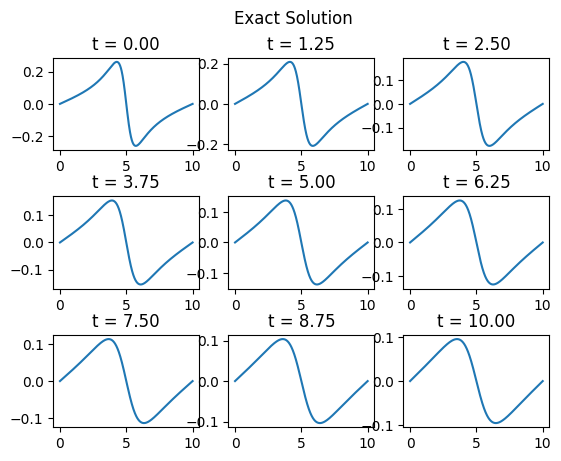

In [6]:
plot_rows = 3
plot_cols = 3
num_plots = plot_rows * plot_cols
t_plot = np.linspace(t0, tN, num_plots)

fig = plt.figure()
fig.suptitle("Exact Solution")
for j, tval in enumerate(t_plot):
    k = round(tval / dt)
    ax = fig.add_subplot(plot_rows, plot_cols, j + 1)
    ax.set_title("t = {:.2f}".format(tval))
    ax.plot(x, solution(x, tval))
plt.subplots_adjust(hspace=0.5)
plt.show()

We can now see that the solution matches our approximation

## Error Plot
Lets do a quick plot of the error at time t=10.

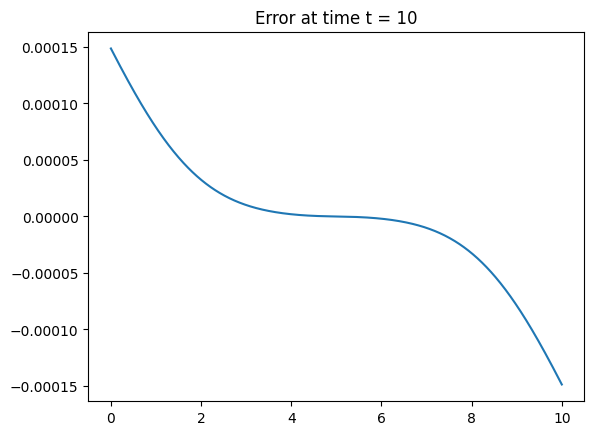

In [7]:
plt.title("Error at time t = 10")
plt.plot(x, U[:, -1] - solution(x, 10))

# Finding the order

For trying to find the order we will set $\ln(\Delta t) = 0.0001$ otherwise we get overflow problem. We then will change $\Delta x$ and the find the maximum absolute error at time t=10.

In [8]:
dx = [0.01, 0.02, 0.03, 0.04, 0.05]
error = []
for i in dx:
    U = forward_euler(0.0001, i)
    error.append(np.max(np.abs(U[:, -1] - solution(np.linspace(x0, xN, int(10/i + 1)), 10))))

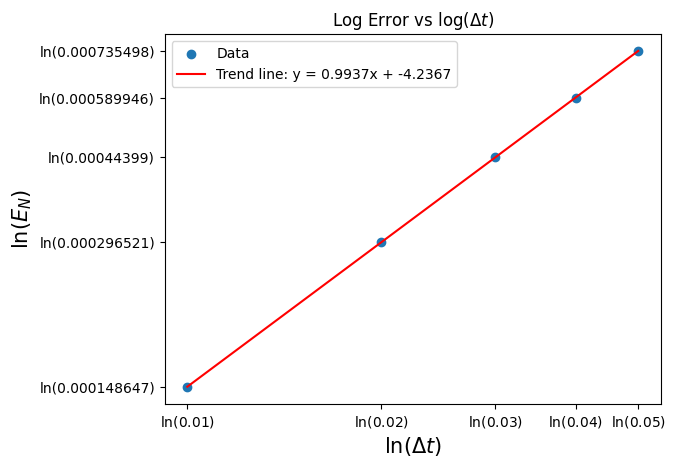

In [9]:
ln_delta_t = np.log(dx)
ln_errors = np.log(error)
x_labels=["ln(${{{}}}$)".format(x) for x in dx]
y_labels = ["ln({})".format(np.round(x, 9)) for x in error]
line = np.polyfit(ln_delta_t, ln_errors, deg =1)
plt.scatter(ln_delta_t, ln_errors, label='Data')
plt.plot(ln_delta_t, np.poly1d(line)(ln_delta_t), color='red', label='Trend line: y = {}x + {}'.format(np.round(line[0], 4), np.round(line[1], 4)))
plt.title("Log Error vs $\log(\Delta t)$")
plt.legend()
plt.xticks(ln_delta_t, labels=x_labels)
plt.yticks(ln_errors, labels = y_labels)
plt.xlabel("$\ln(\Delta t)$", fontsize=15)
plt.ylabel("$\ln(E_N)$", fontsize=15)
plt.show()

This is what we want to see. The line for the error has slope almost equal to one which means that the method is 1st order which is what Forward Euler is. This means that the spectral method with fourier series is giving a very accurate value for the $\dfrac{\partial u}{\partial t}$.

# Conclusion

Since our error analysis is saying that we have a first order method that means that the spectral method with Fourier transforms gives a very accurate estimate for $\frac{\partial u}{\partial t}$. So we can use any of the other Runge-Kutta methods and expect the order to stay the same when using Spectral method with Fourier transforms. It should be noted that everything runs quite quickly which is due to Fast Fourier Transforms requiring O(Nlog(N)) steps.